<a href="https://colab.research.google.com/github/karentutor/ML-Term2-Ex1/blob/master/Copy_of_ML_Term2_OnlineSession1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd
import sqlite3
import re
import spacy

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Paths to data
rspct_path = '/content/drive/My Drive/ML/rspct.tsv'
subreddit_info_path = '/content/drive/My Drive/ML/subreddit_info.csv'

# Load and clean data
df_rspct = pd.read_csv(rspct_path, sep='\t').sample(n=50000, random_state=42).reset_index(drop=True)

# Function to clean text
def clean(s):
    s = s.replace(r'<lb>', "\n").replace(r'<tab>', "\t")
    s = re.sub(r'<br */*>', "\n", s)
    s = s.replace("&lt;", "<").replace("&gt;", ">").replace("&amp;", "&")
    s = re.sub(r'\(https*://[^\)]*\)', "", s)  # Markdown URLs
    s = re.sub(r'https*://[^\s]*', "", s)      # Normal URLs
    s = re.sub(r'_+', ' ', s)
    s = re.sub(r'"+', '"', s)
    return str(s)

df_rspct["selftext_clean"] = df_rspct["selftext"].apply(lambda x: clean(x) if isinstance(x, str) else "")

# Add token count
df_rspct["no_tokens"] = df_rspct["selftext_clean"].apply(lambda x: len(x.split()) if isinstance(x, str) else 0)

# Extract linguistic features using spaCy
nlp = spacy.load("en_core_web_sm")
df_rspct["selftext_nouns"] = ""
df_rspct["selftext_adjectives"] = ""
df_rspct["selftext_verbs"] = ""
df_rspct["selftext_lemma"] = ""

for i, row in df_rspct.iterrows():
    if i % 1000 == 0:
        print(f"Processing row {i}...")

    text = row["selftext_clean"]
    if isinstance(text, str) and len(text) > 0:
        doc = nlp(text)
        nouns = [token.lemma_ for token in doc if token.pos_ in ["NOUN", "PROPN"]]
        adjectives = [token.lemma_ for token in doc if token.pos_ == "ADJ"]
        verbs = [token.lemma_ for token in doc if token.pos_ == "VERB"]
        lemmas = [token.lemma_ for token in doc]

        df_rspct.at[i, "selftext_nouns"] = " ".join(nouns)
        df_rspct.at[i, "selftext_adjectives"] = " ".join(adjectives)
        df_rspct.at[i, "selftext_verbs"] = " ".join(verbs)
        df_rspct.at[i, "selftext_lemma"] = " ".join(lemmas)

# Save to SQLite
con = sqlite3.connect('selfposts.db')
df_rspct.to_sql("posts_nlp", con, if_exists="replace", index=False)

# Load subreddit info and save to SQLite as 'categories' table
df_subreddit_info = pd.read_csv(subreddit_info_path)
df_subreddit_info.to_sql("categories", con, if_exists="replace", index=False)

# Verify table creation
print("Tables in the SQLite database:")
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", con)
print(tables)

# Verify schema of posts_nlp table
print("Schema of posts_nlp table:")
print(pd.read_sql_query("PRAGMA table_info(posts_nlp);", con))
con.close()


Mounted at /content/drive
Processing row 0...
Processing row 1000...
Processing row 2000...
Processing row 3000...
Processing row 4000...
Processing row 5000...
Processing row 6000...
Processing row 7000...
Processing row 8000...
Processing row 9000...
Processing row 10000...
Processing row 11000...
Processing row 12000...
Processing row 13000...
Processing row 14000...
Processing row 15000...
Processing row 16000...
Processing row 17000...
Processing row 18000...
Processing row 19000...
Processing row 20000...
Processing row 21000...
Processing row 22000...
Processing row 23000...
Processing row 24000...
Processing row 25000...
Processing row 26000...
Processing row 27000...
Processing row 28000...
Processing row 29000...
Processing row 30000...
Processing row 31000...
Processing row 32000...
Processing row 33000...
Processing row 34000...
Processing row 35000...
Processing row 36000...
Processing row 37000...
Processing row 38000...
Processing row 39000...
Processing row 40000...
Pro

Columns in the dataset: Index(['id', 'subreddit', 'title', 'selftext', 'selftext_clean', 'no_tokens',
       'selftext_nouns', 'selftext_adjectives', 'selftext_verbs',
       'selftext_lemma', 'category', 'subcategory'],
      dtype='object')

Data Types:
 id                     object
subreddit              object
title                  object
selftext               object
selftext_clean         object
no_tokens               int64
selftext_nouns         object
selftext_adjectives    object
selftext_verbs         object
selftext_lemma         object
category               object
subcategory            object
dtype: object

Total Records: 50000

Non-Null Counts:
 id                     50000
subreddit              50000
title                  50000
selftext               50000
selftext_clean         50000
no_tokens              50000
selftext_nouns         50000
selftext_adjectives    50000
selftext_verbs         50000
selftext_lemma         50000
category               50000
subcatego

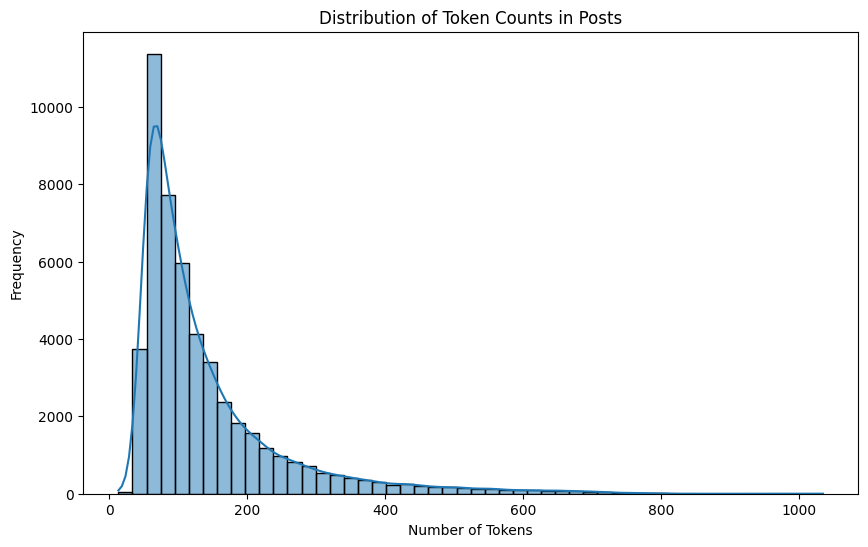

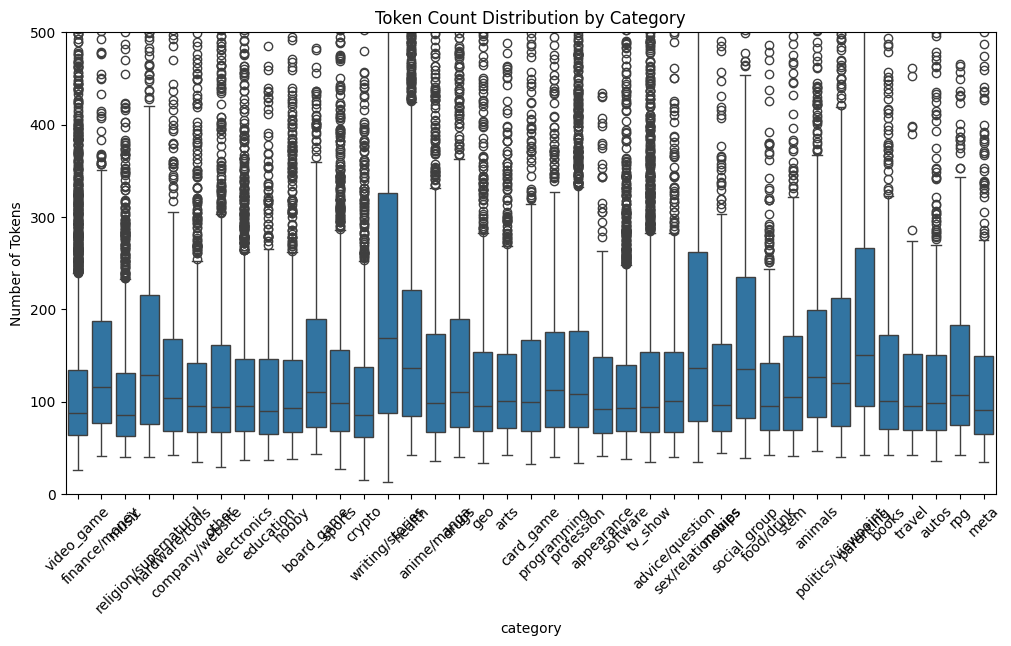


Category Summary:
                  category  num_posts  num_subreddits
0         advice/question        869              18
1                 animals        794              17
2             anime/manga       1334              26
3              appearance        524              11
4                    arts       1079              21
5                   autos        985              20
6              board_game        440               9
7                   books        621              12
8               card_game        689              15
9         company/website       1427              28
10                 crypto       1480              29
11                  drugs       1164              23
12              education        886              17
13            electronics       2532              51
14          finance/money        495              10
15             food/drink        740              15
16                    geo       1433              29
17         hardware/tools 

<ipython-input-10-168bd917161a>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=cat_df, x="category", y="num_posts", palette="viridis")


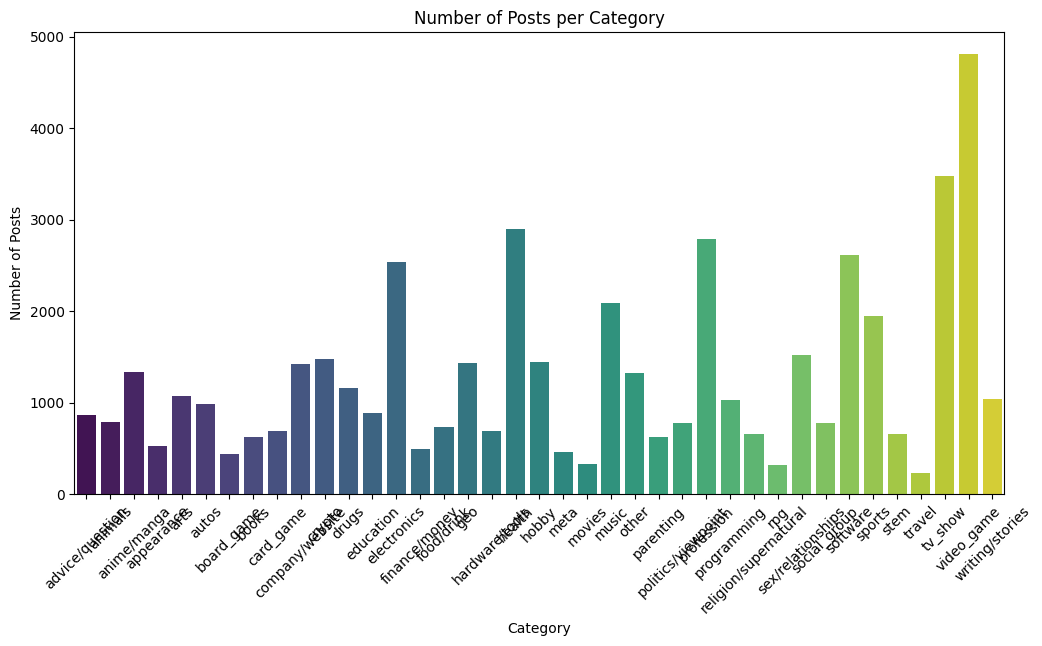


Top 20 Nouns in 'advice/question':
       word  count
0     time    411
1     year    338
2    thing    269
3      day    216
4   people    181
5     name    169
6    thank    168
7     book    165
8     life    161
9     idea    161
10    game    161
11    song    159
12    word    142
13     lot    140
14    help    126
15  friend    121
16    work    117
17       *    116
18     job    115
19    hour    112


<ipython-input-10-168bd917161a>:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=noun_df, x="count", y="word", palette="coolwarm")


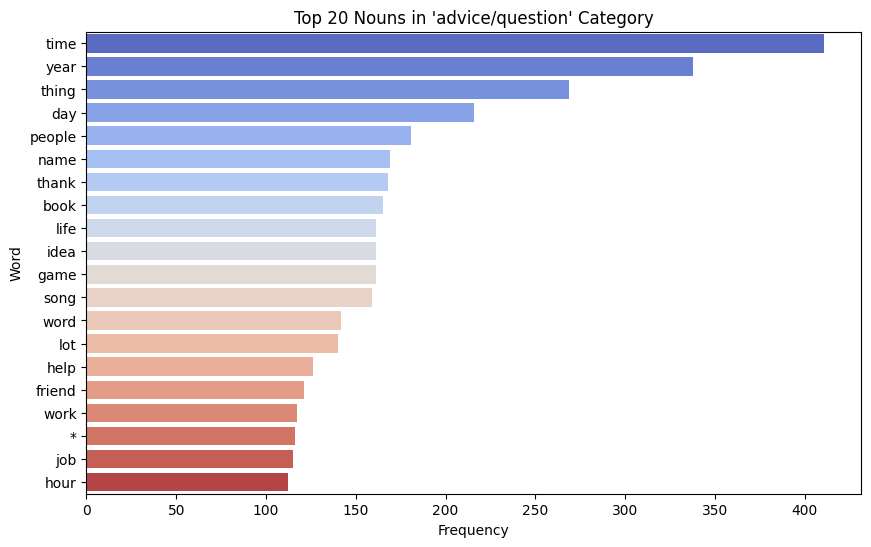

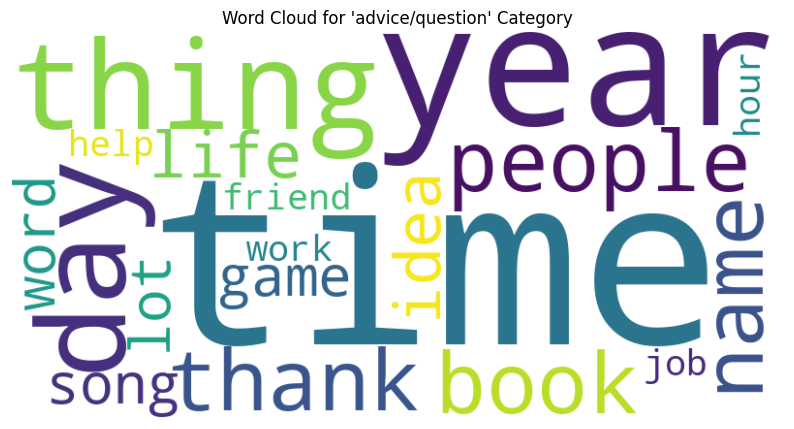


Mean Token Counts by Category:
                  category   no_tokens
0         advice/question  131.453395
1                 animals  162.423174
2             anime/manga  145.514993
3              appearance  123.135496
4                    arts  127.885079
5                   autos  128.684264
6              board_game  156.915909
7                   books  145.660225
8               card_game  139.886792
9         company/website  122.042747
10                 crypto  118.377703
11                  drugs  154.252577
12              education  123.370203
13            electronics  123.406793
14          finance/money  154.846465
15             food/drink  122.006757
16                    geo  128.429170
17         hardware/tools  136.900000
18                 health  178.341489
19                  hobby  126.185517
20                   meta  135.899782
21                 movies  145.511905
22                  music  112.978438
23                  other  135.664404
24              p

<ipython-input-10-168bd917161a>:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=complexity_df, x="category", y="no_tokens", palette="Set2")


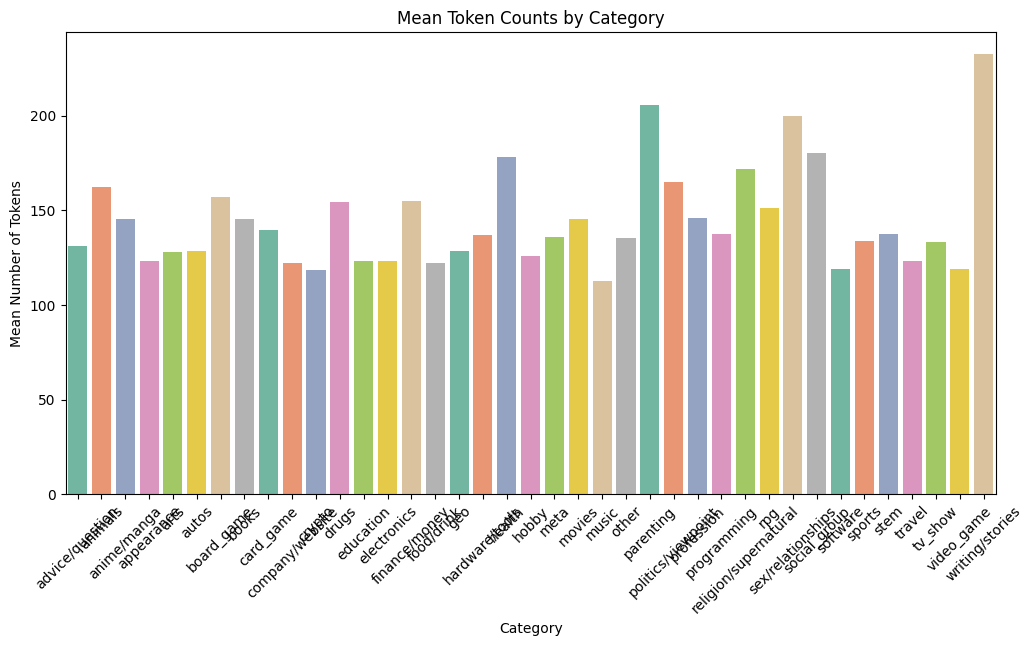


Outliers (Posts with >1000 Tokens):
      subreddit                                     selftext_clean  no_tokens
35593      lego  I went through all 24 builds and recorded all ...       1035


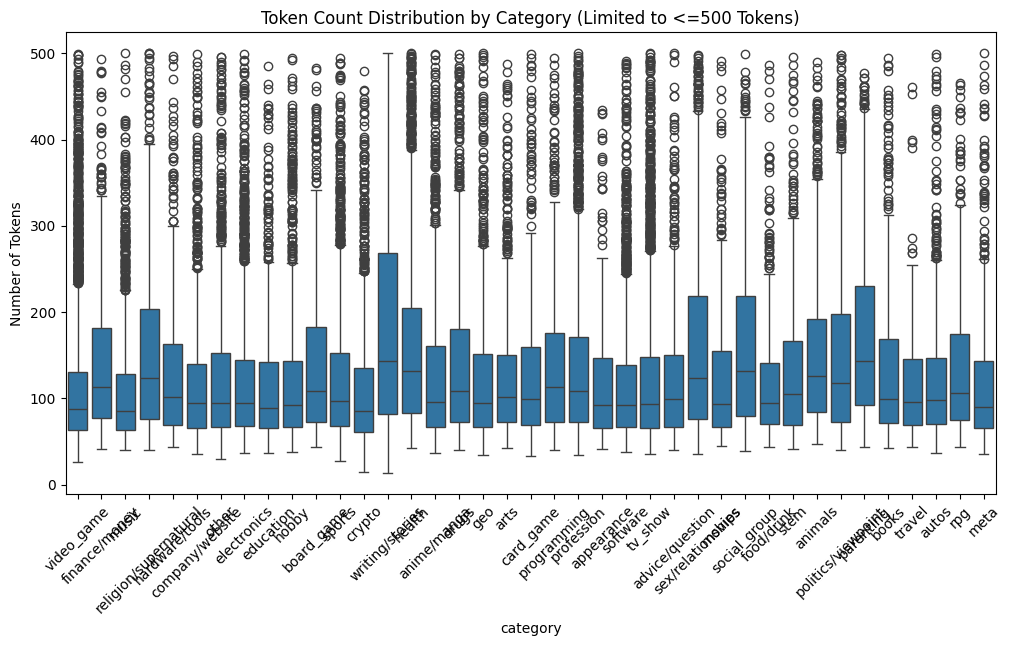

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import numpy as np

# Load data from SQLite database
sql = """
SELECT p.*,
       c.category_1 AS category, c.category_2 AS subcategory
FROM posts_nlp p
JOIN categories c ON p.subreddit = c.subreddit
"""

with sqlite3.connect('selfposts.db') as con:
    df = pd.read_sql_query(sql, con)

# Basic Properties of the Dataset
print("Columns in the dataset:", df.columns)
print("\nData Types:\n", df.dtypes)
print("\nTotal Records:", len(df))
print("\nNon-Null Counts:\n", df.count())
print("\nDataset Info:")
print(df.info(memory_usage="deep"))

# Display a random sample of documents
print("\nRandom Sample of Text Data:\n", df[["subreddit", "selftext_clean", "category", "subcategory"]].sample(5))

# Summary for Numerical Features
print("\nNumerical Summary:\n", df.describe().transpose())

# Summary for Categorical Features
categorical_summary = df.describe(include=[object]).transpose()
print("\nCategorical Summary:\n", categorical_summary)

# Exploring Text Lengths (Token Counts)
plt.figure(figsize=(10, 6))
sns.histplot(df["no_tokens"], bins=50, kde=True)
plt.title("Distribution of Token Counts in Posts")
plt.xlabel("Number of Tokens")
plt.ylabel("Frequency")
plt.show()

# Boxplot for Token Counts by Category
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="category", y="no_tokens")
plt.title("Token Count Distribution by Category")
plt.xticks(rotation=45)
plt.ylabel("Number of Tokens")
plt.ylim(0, 500)  # Limit y-axis to focus on the lower quartiles
plt.show()

# Count Posts by Category
cat_df = df.groupby("category").agg(
    num_posts=("selftext_clean", "count"),
    num_subreddits=("subcategory", "nunique")
).reset_index()

print("\nCategory Summary:\n", cat_df)

# Bar Plot of Posts per Category
plt.figure(figsize=(12, 6))
sns.barplot(data=cat_df, x="category", y="num_posts", palette="viridis")
plt.title("Number of Posts per Category")
plt.xticks(rotation=45)
plt.ylabel("Number of Posts")
plt.xlabel("Category")
plt.show()

# Word Frequency Analysis for a Specific Category
category_to_explore = "advice/question"  # Replace with any category
sub_df = df[df["category"] == category_to_explore]
nouns = " ".join(sub_df["selftext_nouns"].dropna()).split()
noun_counts = Counter(nouns)

# Top 20 Most Common Nouns
noun_df = pd.DataFrame(noun_counts.most_common(20), columns=["word", "count"])
print(f"\nTop 20 Nouns in '{category_to_explore}':\n", noun_df)

# Plot Word Frequencies
plt.figure(figsize=(10, 6))
sns.barplot(data=noun_df, x="count", y="word", palette="coolwarm")
plt.title(f"Top 20 Nouns in '{category_to_explore}' Category")
plt.xlabel("Frequency")
plt.ylabel("Word")
plt.show()

# Word Cloud for Nouns
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(noun_df["word"]))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title(f"Word Cloud for '{category_to_explore}' Category")
plt.show()

# Analyzing Text Complexity by Category
complexity_df = df.groupby("category")["no_tokens"].mean().reset_index()
print("\nMean Token Counts by Category:\n", complexity_df)

# Bar Plot for Mean Token Counts
plt.figure(figsize=(12, 6))
sns.barplot(data=complexity_df, x="category", y="no_tokens", palette="Set2")
plt.title("Mean Token Counts by Category")
plt.xticks(rotation=45)
plt.ylabel("Mean Number of Tokens")
plt.xlabel("Category")
plt.show()

# Explore Outliers in Text Length
outliers = df[df["no_tokens"] > 1000]  # Define outliers as posts with >1000 tokens
print(f"\nOutliers (Posts with >1000 Tokens):\n{outliers[['subreddit', 'selftext_clean', 'no_tokens']].head()}")

# Boxplot for Categories Limited to 500 Tokens
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[df["no_tokens"] <= 500], x="category", y="no_tokens")
plt.title("Token Count Distribution by Category (Limited to <=500 Tokens)")
plt.xticks(rotation=45)
plt.ylabel("Number of Tokens")
plt.show()


